In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder

### Building a Support Vector Machine

In [2]:
input_file = 'data/income_data.txt'

In [3]:
X = []
y = []

count_class1 = 0
count_class2 = 0

max_datapoints = 25000

In [4]:
with open(input_file, 'r') as f:
    for line in f.readlines():
        if count_class1 >= max_datapoints and count_class2 >= max_datapoints:
            break
        if '?' in line:
            continue
            
        data = line[:-1].split(', ')
        
        if data[-1] == '<=50K' and count_class1 < max_datapoints:
            X.append(data)
            count_class1 += 1
            
        if data[-1] == '>50K' and count_class2 < max_datapoints:
            X.append(data)
            count_class2 += 1

In [5]:
X = np.array(X) #convert to numpy array

#convert string data to numerical data
label_encoder = []
X_encoded = np.empty(X.shape)

for i, item in enumerate(X[0]):
    if item.isdigit():
        X_encoded[:, i] = X[:, i]
    else:
        label_encoder.append(LabelEncoder())
        X_encoded[:, i] = label_encoder[-1].fit_transform(X[:, i])

In [6]:
X = X_encoded[:, :-1].astype('int')
y = X_encoded[:, -1].astype('int')

In [7]:
#cross validation 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

classifier = OneVsOneClassifier(LinearSVC(random_state = 0))
classifier.fit(X_train, y_train)

y_test_pred = classifier.predict(X_test)

C:\Users\U\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [8]:
#Compute F1 score
f1 = cross_val_score(classifier, X, y, scoring = 'f1_weighted', cv = 3)
print(f'F1 score: {round(100 * f1.mean(), 2)}%')

C:\Users\U\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\U\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


F1 score: 56.15%


C:\Users\U\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [9]:
# Predict output for a test datapoint
input_data = ['37', 'Private', '215646', 'HS-grad', '9', 'Never-married', 'Handlers-cleaners', 'Not-in-family', 
              'White', 'Male', '0', '0', '40', 'United-States']

#Encode test datapoint
input_data_encoded = [-1] * len(input_data)
count = 0

for i, item in enumerate(input_data):
    if item.isdigit():
        input_data_encoded[i] = int(input_data[i])
    else:
        input_data_encoded[i] = int(label_encoder[count].transform([input_data[i]]))
        count += 1

In [10]:
input_data_encoded = np.array(input_data_encoded)

In [11]:
#Run the classifier on the encoded datapoint
predicted_class = classifier.predict([input_data_encoded])
print(label_encoder[-1].inverse_transform(predicted_class)[0])

<=50K


### Building a Single-Variable Regressor

In [12]:
import pickle

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, explained_variance_score, r2_score

In [13]:
input_file = 'data/data_singlevar_regr.txt'

data = np.loadtxt(input_file, delimiter = ',')
X, y = data[:, :-1], data[:, -1]

In [14]:
#Using manual splitting to obtain the train and test sets
num_training = int(0.8 * len(X))

X_train, X_test = X[:num_training], X[num_training:]
y_train, y_test = y[:num_training], y[num_training:]

In [15]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_test_pred = regressor.predict(X_test)

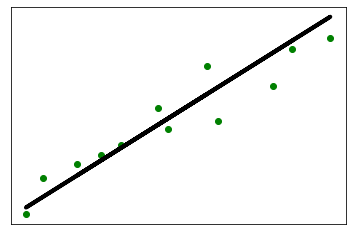

In [16]:
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_test, y_test_pred, color = 'black', linewidth = 4)

plt.xticks(())
plt.yticks(());

In [17]:
#Compute performance metrics

print('Linear regressor performance:\n')
print(f'Mean absolute error = {round(mean_absolute_error(y_test, y_test_pred), 2)}')
print(f'Mean squared error = {round(mean_squared_error(y_test, y_test_pred), 2)}')

print(f'Median absolute error = {round(median_absolute_error(y_test, y_test_pred), 2)}')
print(f'Explained variance score = {round(explained_variance_score(y_test, y_test_pred), 2)}')

print(f'R2 score = {round(r2_score(y_test, y_test_pred), 2)}')

Linear regressor performance:

Mean absolute error = 0.59
Mean squared error = 0.49
Median absolute error = 0.51
Explained variance score = 0.86
R2 score = 0.86


In [18]:
import pickle

output_model_file = 'data/model.pkl'

with open(output_model_file, 'wb') as f:
    pickle.dump(regressor, f)

In [19]:
with open(output_model_file, 'rb') as f:
    regressor_model = pickle.load(f)

In [20]:
#Perform prediction

y_test_pred_new = regressor_model.predict(X_test)
print(f'New mean absolute error = {round(mean_absolute_error(y_test, y_test_pred_new), 2)}')

New mean absolute error = 0.59


### Building a multivariable regressor

In [21]:
from sklearn.preprocessing import PolynomialFeatures

input_file = 'data/data_multivar_regr.txt'

In [22]:
data = np.loadtxt(input_file, delimiter = ',')

X, y = data[:, :-1], data[:, -1]

In [23]:
num_training = int(0.8 * len(X))

X_train, X_test = X[:num_training], X[num_training:]
y_train, y_test = y[:num_training], y[num_training:]

In [24]:
linear_regressor = LinearRegression()

linear_regressor.fit(X_train, y_train)

y_test_pred = linear_regressor.predict(X_test)

In [25]:
#Measure performance

print('Linear Regressor performance: \n')
print(f'Mean absolute error = {round(mean_absolute_error(y_test, y_test_pred), 2)}')
print(f'Mean squared error = {round(mean_squared_error(y_test, y_test_pred), 2)}')

print(f'Median absolute error = {round(median_absolute_error(y_test, y_test_pred), 2)}')
print(f'Explained variance score = {round(explained_variance_score(y_test, y_test_pred), 2)}')

print(f'R2 score = {round(r2_score(y_test, y_test_pred), 2)}')

Linear Regressor performance: 

Mean absolute error = 3.58
Mean squared error = 20.31
Median absolute error = 2.99
Explained variance score = 0.86
R2 score = 0.86


In [26]:
polynomial = PolynomialFeatures(degree = 10)
X_train_transformed = polynomial.fit_transform(X_train)

datapoint = [[7.75, 6.35, 5.56]]
poly_datapoint = polynomial.fit_transform(datapoint)

In [27]:
poly_linear_model = LinearRegression()
poly_linear_model.fit(X_train_transformed, y_train)

print(f'Linear Regression: {linear_regressor.predict(datapoint)}')
print(f'Polynomial Regression: {poly_linear_model.predict(poly_datapoint)}')

Linear Regression: [36.05286276]
Polynomial Regression: [41.45271718]


### Estimating house prices using Support Vector Regressor

In [28]:
from sklearn import datasets
from sklearn.svm import SVR
from sklearn.utils import shuffle

In [29]:
data = datasets.load_boston()

In [30]:
#shuffle the data
X, y = shuffle(data.data, data.target, random_state = 7)

In [31]:
#Using manual splitting 
num_training = int(0.8 * len(X))

X_train, X_test = X[:num_training], X[num_training:]
y_train, y_test = y[:num_training], y[num_training:]

In [32]:
sv_regressor = SVR(kernel = 'linear', C = 1.0, epsilon = 0.1)

sv_regressor.fit(X_train, y_train)

SVR(kernel='linear')

In [33]:
#Evaluate the performance of the SVR
y_test_pred = sv_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_test_pred)
evs = explained_variance_score(y_test, y_test_pred)

print('Performance\n')
print(f'Mean squared error = {round(mse, 2)}')
print(f'Explained variance score = {round(evs, 2)}')

Performance

Mean squared error = 15.38
Explained variance score = 0.82


In [34]:
#Test the regressor on the test datapoint
test_data = [3.7, 0, 18.4, 1, 0.87, 5.95, 91, 2.5052, 26, 666, 20.2, 351.34, 15.27]

print(f'Predicted_price = {sv_regressor.predict([test_data])[0]}')

Predicted_price = 18.521780107258536


### Building a decision tree classifier

In [35]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

from data.utilities import visualize_classifier

In [36]:
input_file = 'data/data_decision_trees.txt'

data = np.loadtxt(input_file, delimiter = ',')
X, y = data[:, :-1], data[:, -1]

In [37]:
#Separate input data into classes based on labels (2 in this case)

class_0 = np.array(X[y == 0])
class_1 = np.array(X[y == 1])

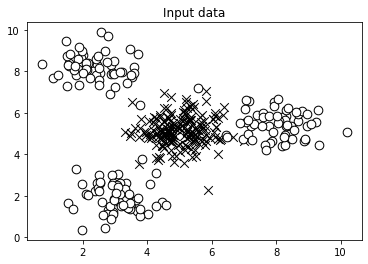

In [38]:
#Visualize the input data

plt.figure()
plt.scatter(class_0[:, 0], class_0[:, 1], s = 75, facecolors = 'black', edgecolors = 'black', linewidth = 1, marker = 'x')

plt.scatter(class_1[:, 0], class_1[:, 1], s = 75, facecolors = 'white', edgecolors = 'black', linewidth = 1, marker = 'o')
plt.title('Input data');

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)

C:\Users\U\Artificial Intelligence\data\utilities.py:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x_vals, y_vals, output, cmap = plt.cm.gray)


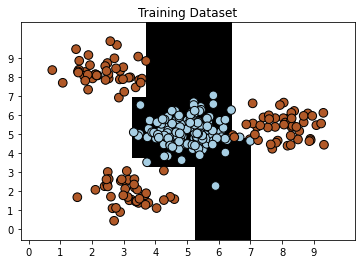

In [40]:
#The decision tree classifier

params = {'random_state': 0, 'max_depth': 4}
classifier = DecisionTreeClassifier(**params)

classifier.fit(X_train, y_train)

visualize_classifier(classifier, X_train, y_train, 'Training Dataset');

C:\Users\U\Artificial Intelligence\data\utilities.py:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x_vals, y_vals, output, cmap = plt.cm.gray)


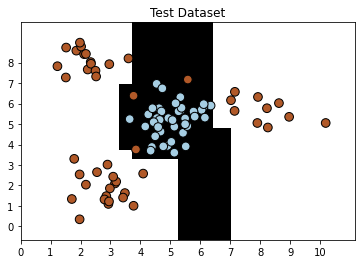

In [41]:
y_test_pred = classifier.predict(X_test)

visualize_classifier(classifier, X_test, y_test, 'Test Dataset');

In [42]:
#Evaluate the classifier performance

class_names = ['class-0', 'class-1']

print('Classifier performance on the training dataset\n')
y_train_pred = classifier.predict(X_train)
print(classification_report(y_train, y_train_pred, target_names = class_names))

Classifier performance on the training dataset

              precision    recall  f1-score   support

     class-0       0.99      1.00      1.00       137
     class-1       1.00      0.99      1.00       133

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270



In [43]:
print('Classifier performance on the test dataset\n')

print(classification_report(y_test, y_test_pred, target_names = class_names))

Classifier performance on the test dataset

              precision    recall  f1-score   support

     class-0       0.93      1.00      0.97        43
     class-1       1.00      0.94      0.97        47

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90



### Random forest and extremely-random forest classifiers

In [46]:
#Solved using python files under the data folder